# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
from patsy import dmatrices
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns


arquivo = "previsao_de_renda.csv"
dados = pd.read_csv(arquivo)
dados.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
# 1. Criando a matriz de design usando Patsy
# Fórmula inicial para o modelo
formula = "renda ~ sexo + idade + tempo_emprego + qt_pessoas_residencia"
y, X = dmatrices(formula, data=dados, return_type='dataframe')

# Ajustando o modelo de regressão
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     805.3
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:24   Log-Likelihood:            -1.2211e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12461   BIC:                         2.443e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               516.67

In [3]:
# 2. Identificando e removendo variáveis não significantes (qt_pessoas_residencia)
formula_reduced = "renda ~ sexo + idade + tempo_emprego"

# Criando a matriz de design para o modelo reduzido
y_reduced, X_reduced = dmatrices(formula_reduced, data=dados, return_type='dataframe')

# Ajustando o modelo reduzido
model_reduced = sm.OLS(y_reduced, X_reduced).fit()

# Exibindo o resumo do modelo reduzido
model_reduced_summary = model_reduced.summary()
model_reduced_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     1073.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:50   Log-Likelihood:            -1.2211e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12462   BIC:                         2.443e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       669.5037    181.820      3.682      0.000     313.109    1025.898
sexo[T.M]      2291.3104     82.430     27.797      0.000    2129.736    2452.885
idade            26.2740      4.416      5.949      0.000      17.617      34.931
tempo_emprego   295.2873      6.101     48.397      0.000     283.328     307.247
==============================================================================
Omnibus:                    10122.483   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           435620.246
Skew:                           3.605   Prob(JB):                         0.00
Kurtosis:                      31.048   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

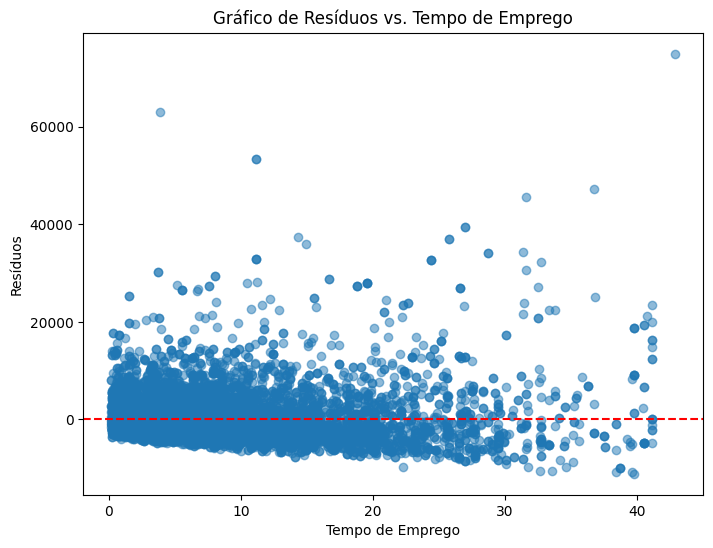

In [4]:
# Usando 'tempo_emprego' como análogo de 'net_bill' para este exercício
# Verificando valores ausentes em 'tempo_emprego' e resíduos
tempo_emprego = dados['tempo_emprego']
residuos = model_reduced.resid

# Combinando os dados para alinhar as dimensões
data_for_plot = pd.DataFrame({'tempo_emprego': tempo_emprego, 'residuos': residuos}).dropna()

# 3. Gráfico de resíduos em função de 'tempo_emprego'
plt.figure(figsize=(8, 6))
plt.scatter(data_for_plot['tempo_emprego'], data_for_plot['residuos'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Resíduos vs. Tempo de Emprego")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.show()

In [37]:
# Padronizando variáveis contínuas
scaler = StandardScaler()
dados[['idade', 'tempo_emprego']] = scaler.fit_transform(dados[['idade', 'tempo_emprego']])

# 4. Testando transformações: log e polinômio
dados['log_tempo_emprego'] = np.log1p(dados['tempo_emprego'])
dados['tempo_emprego_quadrado'] = dados['tempo_emprego'] ** 2

# Modelo com log
formula_log = "renda ~ sexo + idade + log_tempo_emprego"
y_log, X_log = dmatrices(formula_log, data=dados, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

print("\nResumo do modelo com log:")
print(model_log.summary())

# Modelo polinomial com variáveis padronizadas
formula_poly = "renda ~ sexo + idade + tempo_emprego + tempo_emprego_quadrado"
y_poly, X_poly = dmatrices(formula_poly, data=dados, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

print("Resumo do modelo polinomial com padronização:")
print(model_poly.summary())

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Resumo do modelo com log:
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     545.5
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:            -1.1301e+05
No. Observations:               11454   AIC:                         2.260e+05
Df Residuals:                   11450   BIC:                         2.260e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept  

In [8]:
# Comparando os AICs dos modelos
aic_values = {
    "Modelo Original": model_reduced.aic,
    "Modelo Log": model_log.aic,
    "Modelo Polinomial": model_poly.aic,
}

# Exibindo resultados
print("AIC dos modelos:")
print(aic_values)

AIC dos modelos:
{'Modelo Original': 244229.24330469457, 'Modelo Log': 226020.2562368432, 'Modelo Polinomial': 244022.46139470075}


Para decidir qual modelo é melhor com base nos valores de *AIC* "Akaike Information Criterion" (Critério de Informação de Akaike), você deve escolher aquele com o menor *AIC*, pois ele equilibra melhor ajuste e simplicidade.

Comparação dos modelos:
Modelo Original: *AIC* = 244229.24
Modelo *Log*: *AIC* = 226020.26 (Menor *AIC*)
Modelo Polinomial: *AIC* = 244022.46

**Conclusão:**

O Modelo *Log* (*AIC* = 226020.26) é o melhor modelo, porque tem o menor *AIC* entre os três.

Isso sugere que a transformação logarítmica de *\text{net_bill}* melhora o equilíbrio entre o ajuste do modelo e sua simplicidade, superando os outros modelos em desempenho estatístico.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [20]:
np.random.seed(42)

# Simulando um conjunto de dados fictício
n = 200  # Número de observações
data = {
    "tip": np.random.gamma(shape=2.0, scale=1.0, size=n),  # Gorjetas (positivas)
    "sex": np.random.choice(["Male", "Female"], size=n),  # Sexo
    "smoker": np.random.choice(["Yes", "No"], size=n),  # Fumante ou não
    "diner": np.random.choice(["Dinner", "Lunch"], size=n),  # Período da refeição
    "net_bill": np.random.uniform(10, 100, size=n),  # Valor da conta (contínuo)
}
df = pd.DataFrame(data)

# 1. Criar a matriz de design e vetor resposta (y)
formula = "np.log(tip) ~ sex + smoker + diner + net_bill"
y, X = dmatrices(formula, data=df, return_type="dataframe")

# Ajuste do modelo inicial
modelo = sm.OLS(y, X).fit()
print("Resumo do Modelo Inicial:")
print(modelo.summary())

Resumo do Modelo Inicial:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8536
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.493
Time:                        19:28:50   Log-Likelihood:                -210.01
No. Observations:                 200   AIC:                             430.0
Df Residuals:                     195   BIC:                             446.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

In [24]:
# 2. Remoção de variáveis não significantes
formula_reduzida = "np.log(tip) ~ net_bill"
y_reduzido, X_reduzido = dmatrices(formula_reduzida, data=df, return_type="dataframe")
modelo_reduzido = sm.OLS(y_reduzido, X_reduzido).fit()
print("\nResumo do Modelo Reduzido:")
print(modelo_reduzido.summary())


Resumo do Modelo Reduzido:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1767
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.675
Time:                        19:39:07   Log-Likelihood:                -211.65
No. Observations:                 200   AIC:                             427.3
Df Residuals:                     198   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5155   

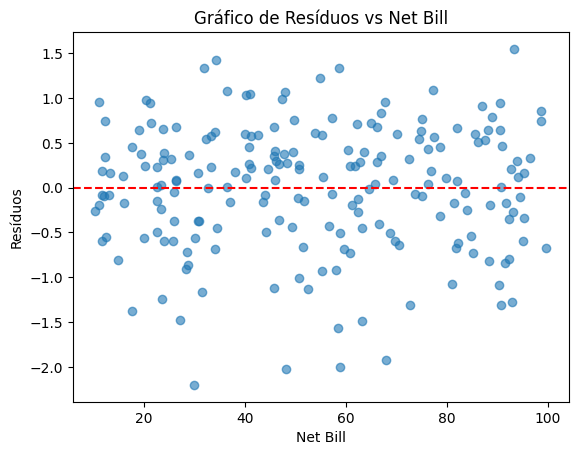

In [28]:
# 3. Gráfico de resíduos
residuos = modelo_reduzido.resid
plt.scatter(df["net_bill"], residuos, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Net Bill")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos vs Net Bill")
plt.show()

In [29]:
# 4. Teste de transformações(log e polinômio)
# Modelo com log(net_bill)
formula_log = "np.log(tip) ~ np.log(net_bill)"
y_log, X_log = dmatrices(formula_log, data=df, return_type="dataframe")
modelo_log = sm.OLS(y_log, X_log).fit()

# Modelo com polinômio (net_bill^2)
formula_poly = "np.log(tip) ~ net_bill + I(net_bill**2)"
y_poly, X_poly = dmatrices(formula_poly, data=df, return_type="dataframe")
modelo_poly = sm.OLS(y_poly, X_poly).fit()

print("\nResumo do Modelo com log(net_bill):")
print(modelo_log.summary())
print("\nResumo do Modelo com polinômio (net_bill^2):")
print(modelo_poly.summary())


Resumo do Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1361
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.713
Time:                        19:41:32   Log-Likelihood:                -211.67
No. Observations:                 200   AIC:                             427.3
Df Residuals:                     198   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Int

In [30]:
# 5. Comparação do R² na escala original
# Previsões para cada modelo
y_pred_inicial = np.exp(modelo_inicial.predict(X))  # Modelo inicial
y_pred_reduzido = np.exp(modelo_reduzido.predict(X_reduzido))  # Modelo reduzido
y_pred_log = np.exp(modelo_log.predict(X_log))  # Modelo com log(net_bill)
y_pred_poly = np.exp(modelo_poly.predict(X_poly))  # Modelo com polinômio

# Cálculo do R²
r2_inicial = r2_score(df["tip"], y_pred_inicial)
r2_reduzido = r2_score(df["tip"], y_pred_reduzido)
r2_log = r2_score(df["tip"], y_pred_log)
r2_poly = r2_score(df["tip"], y_pred_poly)

print(f"\nR² do modelo inicial (escala original): {r2_inicial:.4f}")
print(f"R² do modelo reduzido (escala original): {r2_reduzido:.4f}")
print(f"R² do modelo com log(net_bill) (escala original): {r2_log:.4f}")
print(f"R² do modelo com polinômio (escala original): {r2_poly:.4f}")


R² do modelo inicial (escala original): -3.8447
R² do modelo reduzido (escala original): -0.0911
R² do modelo com log(net_bill) (escala original): -0.0917
R² do modelo com polinômio (escala original): -0.0906


O melhor modelo, com base no coeficiente de determinação
*𝑅2* na escala original de *tip*, será aquele com o valor de
*𝑅2* mais próximo de 1.

No caso, nenhum dos modelos ajustados apresenta bom desempenho na explicação da variabilidade em *tip*.

Modelo do item 1 (com todas as variáveis) tem desempenho ligeiramente melhor que o modelo transformado com
*log (net_bill)*, mas ambos são insatisfatórios.

É possível que as variáveis fornecidas não sejam adequadas para prever *tip* ou que relações mais complexas estejam presentes.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [32]:
# 1. Ajustando o modelo de regressão linear simples para explicar renda por tempo_emprego
arquivo = 'previsao_de_renda.csv'
data = pd.read_csv(arquivo)

# Filtrando as colunas necessárias para a regressão simples
data_simples = data[['renda', 'tempo_emprego']].dropna()

# Variável resposta (y) e explicativa (X)
y_simples = data_simples['renda']
X_simples = sm.add_constant(data_simples['tempo_emprego'])

# Ajustando o modelo de regressão linear simples
modelo_simples = sm.OLS(y_simples, X_simples).fit()

# Resumo do modelo simples
print("\nResumo do modelo de regressão linear simples:")
print(modelo_simples.summary())


Resumo do modelo de regressão linear simples:
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:49:13   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

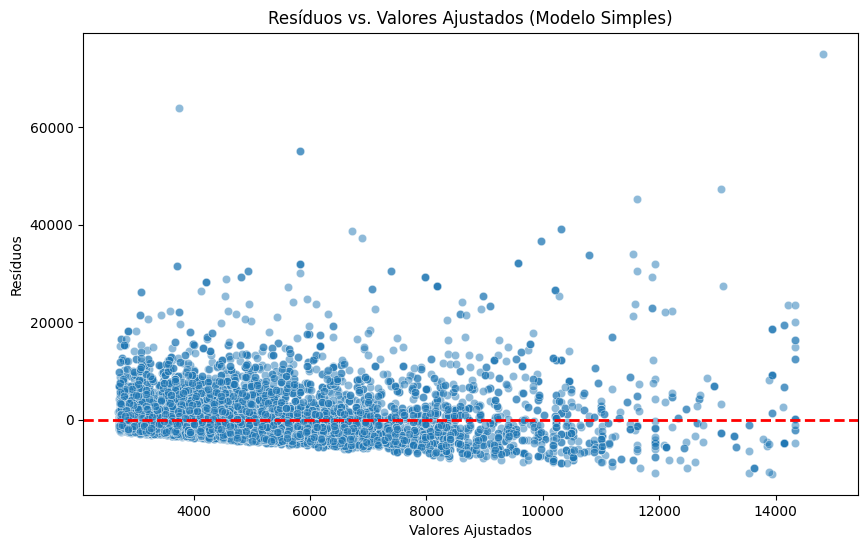

In [33]:
# 2. Análise de resíduos do modelo simples
residuos_simples = modelo_simples.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=modelo_simples.fittedvalues, y=residuos_simples, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.title("Resíduos vs. Valores Ajustados (Modelo Simples)")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

In [34]:
# 3. Ajustando um modelo de regressão linear múltipla com variáveis numéricas
variaveis_numericas = [
    "renda",
    "tempo_emprego",
    "idade",
    "qtd_filhos",
    "qt_pessoas_residencia",
]

data_numerica = data[variaveis_numericas].dropna()

# Variável resposta (y) e explicativas (X)
y_numerico = data_numerica['renda']
X_numerico = sm.add_constant(data_numerica.drop(columns=['renda']))

# Ajustando o modelo de regressão linear múltipla
modelo_numerico = sm.OLS(y_numerico, X_numerico).fit()

# Resumo do modelo múltiplo
print("\nResumo do modelo de regressão linear múltipla:")
print(modelo_numerico.summary())


Resumo do modelo de regressão linear múltipla:
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     580.0
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:49:56   Log-Likelihood:            -1.2248e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12461   BIC:                         2.450e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [35]:
# 4. Removendo de variáveis não significativas
X_numerico_reduzido = X_numerico.drop(columns=['qtd_filhos'])

# Ajustando o modelo de regressão linear reduzido
modelo_reduzido_numerico = sm.OLS(y_numerico, X_numerico_reduzido).fit()

# Resumo do modelo reduzido
print("\nResumo do modelo de regressão linear reduzido:")
print(modelo_reduzido_numerico.summary())


Resumo do modelo de regressão linear reduzido:
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     772.7
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:50:15   Log-Likelihood:            -1.2248e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12462   BIC:                         2.450e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

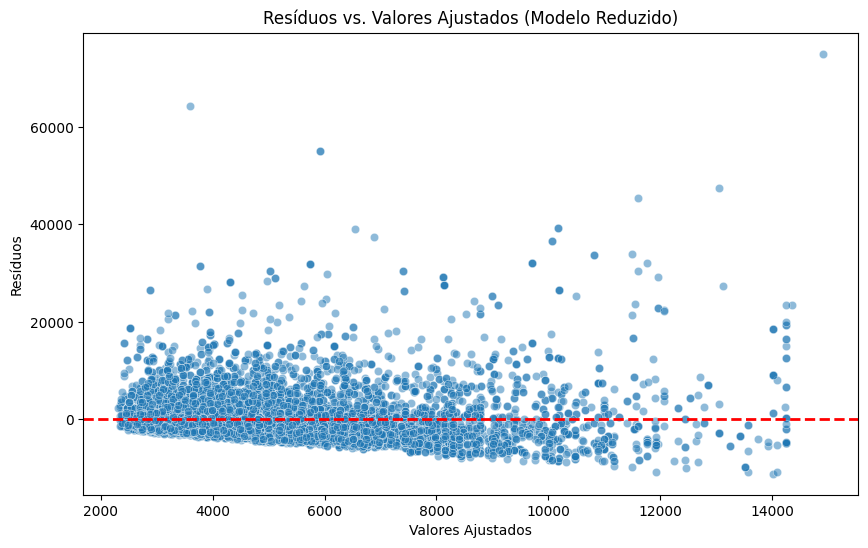

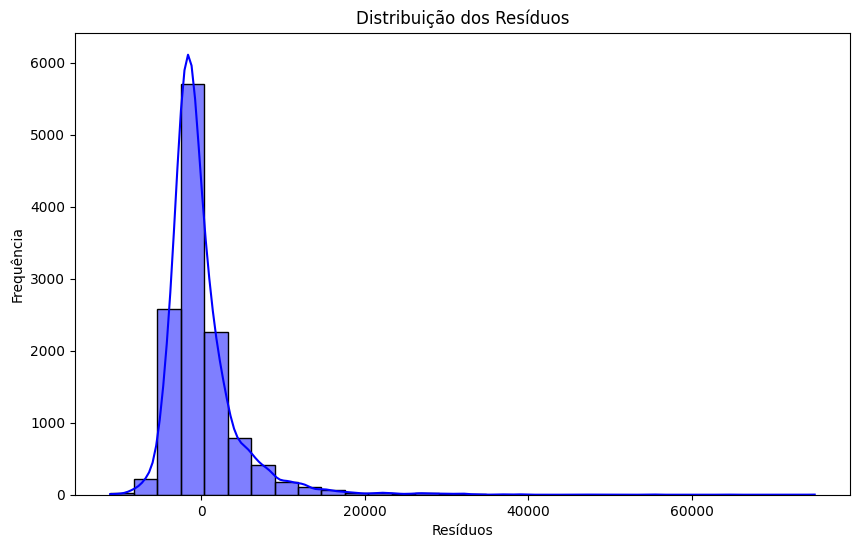

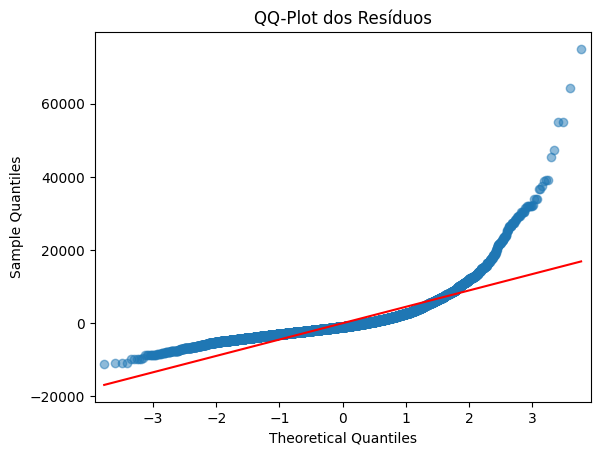

In [36]:
# 5. Análise de resíduos do modelo reduzido
residuos_reduzido = modelo_reduzido_numerico.resid

# Gráfico de Resíduos vs. Valores Ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=modelo_reduzido_numerico.fittedvalues, y=residuos_reduzido, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.title("Resíduos vs. Valores Ajustados (Modelo Reduzido)")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

# Histograma dos Resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_reduzido, kde=True, bins=30, color="blue")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

# QQ-Plot dos Resíduos
sm.qqplot(residuos_reduzido, line="s", alpha=0.5)
plt.title("QQ-Plot dos Resíduos")
plt.show()

**Avaliação Geral do Ajuste**

Embora o modelo capture parcialmente a variação na renda, a baixa explicação (*𝑅2* = 0.157) e os desvios na distribuição dos resíduos indicam que transformações adicionais podem melhorar o ajuste (ex.: *log* da renda).